# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Eaxmine model's coefficients and decision function values
* Interpret model results using LIME

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/lab7-train.parquet", storage_options={"anon":True})
test = pd.read_parquet("s3://ling583/lab7-test.parquet", storage_options={"anon":True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [6]:
# retrieve the model saved from earlier 
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [7]:
sgd

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.75, min_df=5,
                                 preprocessor=<cyfunction identity at 0x7fa5e396a2b0>,
                                 tokenizer=<function tokenize at 0x7fa5e04a4550>)),
                ('tfidftransformer', TfidfTransformer()),
                ('sgdclassifier', SGDClassifier())])

In [12]:
predicted = sgd.predict(test["text"])
print(classification_report(test["topics"], predicted))
# macro average is .94, which is better than what we expected 

              precision    recall  f1-score   support

        GJOB       0.97      0.94      0.95       573
        GPOL       0.94      0.97      0.95      1853
        GSPO       1.00      0.99      1.00      1410
        GVIO       0.93      0.90      0.91       928

    accuracy                           0.96      4764
   macro avg       0.96      0.95      0.95      4764
weighted avg       0.96      0.96      0.96      4764



---

## Confusion matrix

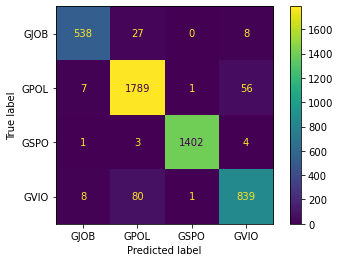

In [14]:
plot_confusion_matrix(sgd, test["text"], test["topics"])
# how often label are confused with each other 
# the diagonal are the right label = true label are same as predited 

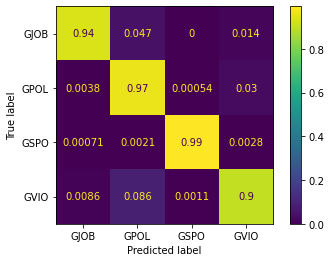

In [10]:
plot_confusion_matrix(sgd, test["text"], test["topics"], normalize='true')
# proportion of true values 

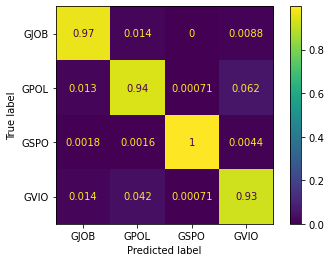

In [11]:
plot_confusion_matrix(sgd, test["text"], test["topics"], normalize='pred')
# normalized prediction values 

**TO DO:**Summarize this section: what does the confusion matrix tell us about our classifier?

The confusion matrix tell us the true scores and probability of the empirical values compared to the predicted values. In this case, the true values are really similar to the predicted values with all of the categories (GVIO, GSPO, GPOL, and GJOB) have a proportion of being true of higher than .94. This makes the predicted values that are differfent than true values to be really low. For example, about 9% of the time GVIO will be misclassified as GPOL. On the other hand, GJOB will never be misclassified as GSPO.   

----

## Errors

In [15]:
err = test[(test['topics']=='GVIO')&(predicted=='GPOL')]
len(err)

80

In [16]:
err['text'].iloc[0]

"Documents missing on chemicals in Gulf - report. The U.S. Defence Department said nearly all the classified documents recording incidents of chemical weapons use during the Gulf war are missing despite an exhaustive search, the New York Times reported on Friday. The paper said copies of the logs were kept in safes at two U.S. locations, but a new report from the Defence Department indicates only 36 pages out of an estimated 200 have been found in a search by its investigators. The missing logs include those for eight days in March 1991 when U.S. troops unknowingly blew up chemical weapons in an Iraqi arms dump, the paper said. Those logs, which were maintained for Gen. Norman Schwarzkopf, were first reported missing in December. Friday's paper said the new report heightens speculation about a cover-up or criminal incompetence within the Defence Department, which had denied the existence of such records before agreeing last year to release them to a veterans' group. It said the logs we

In [17]:
err['text'].iloc[1]

'China to approve Shell petchem joint venture soon. China\'s executive vice chairman of state planning Ye Qing on Friday said he expected the Chinese authorities soon to approve a major joint venture project to build a petrochemical plant with Shell in Guangdong province. "I saw the managing director of Shell two days ago and I told him that I personally and the state commission will approve this project very soon," Ye told reporters in Paris at a press conference following an International Energy Agency ministerial meeting. The project to build a petrochemical plant is a joint venture with the state China National Offshore Oil Corporation and has been under discussion since 1971 Ye said the plants was expected to produce 85 million tonnes a year of ethylene, having been raised from previous plans for 45 million tonnes of annual capacity. Ye also said that plans for a refinery at the same site remained on hold. "To ensure a better return for the project we have decided not to build a r

In [18]:
err['text'].iloc[2]

'Australian Jews scan Swiss Holocaust bank list. Hundreds of relatives of Jewish Holocaust victims living in Australia could be eligible for funds in Swiss banks after the publication of more than 2,000 pre-1945 accounts, Jewish officials said on Wednesday. While only four Australian names were on the list, Australia boasts the world\'s fourth largest Jewish population, due to large scale post-World War Two migration. "There are more Jews of Polish decent living in Australia than there are Jews living in Poland," said Jeremy Jones, spokesman for the Executive Council of Australian Jewry. "There could potentially be hundreds (of relatives) on this list, but we do not believe that this list is comprehensive or exhaustive. This is the list from the Swiss banks: it is not a list discovered by any independent audit," Jones told Reuters. The Swiss Bankers Association took out a double-page advertisement in The Australian national newspaper, listing more than 2,000 pre-1945 accounts, includin

In [19]:
for t in err['text'].sample(20):
    print(t)
    print()

U.S. concerned by Wang Dan sentence. The United States on Wednesday expressed deep concern over the prison term given to Chinese dissident Wang Dan and said Secretary of State Warren Christopher would discuss the case in Beijing next month. "We urge the Chinese authorities to show clemency to this courageous man, whose championing of democratic values has gained him deserved international recognition," U.S. State Department spokesman Nicholas Burns said. A Beijing court on Wednesday sentenced Wang to 11 years in prison and said the 27-year-old former student leader would be deprived of his political rights for a further two years for plotting to subvert the government. "We are deeply concerned by the sentence that has been given to Wang Dan," White House spokesman Mike McCurry said. "He is one of the premier voices in China for human rights and workers' rights, expressing his own opinion, which he is freely entitled to do under the universal declaration of human rights," McCurry added.

In [20]:
err = test[(test['topics']=='GPOL')&(predicted=='GVIO')]
len(err)

56

In [21]:
for t in err['text'].sample(20):
    print(t)
    print()

Taleban say criticism of policy on women misplaced. A leader of the militant Islamic Taleban movement on Tuesday dismissed criticism from the United Nations and Western countries of its policies towards women. "Afghan society is different from Western society," said Maulvi Wakil Ahmed, a senior member of the Taleban shura (council) contacted in the southern city of Kandahar. "In Afghan society it is impossible for women to live as they do in Western society," he said. "We are working on women's rights in the light of Afghan society and Islam." He said there had been a "misunderstanding" between the Taleban administration in Kabul and the United Nations, the United States and other countries. This was partly due to what he called incorrect reporting by the media, "who see everything in Kabul through Western eyes." U.N. Secretary-General Boutros Boutros-Ghali has warned the Taleban that discrimination against women in employment and education could seriously affect relief programmes. He 

**TO DO:** Based on your error analysis, what are some of the classifier's strengths and weaknesses? What might we do to improve it?

Some strengths of the classifier model are: 
- Automate the labeling process and make the process faster when we have a lot of documents to label 
- We have a high probability of having the right label if we have a robust model with lots of training data 
- The labels can be adjusted based on the training data and preferences 
Some weaknesses of the classifier model are: 
- There might be error in the classifiers 
- The model is not robust if the proportion of error is high 
- Sometimes the actual labels are not as correct as the predicted model 

To improve the model, we can use different statistical method for classification. In addition, we can also use different model technique to get the proportion of each topics instead of a single labels for each document. In addition, we can also optimize the model more to find better parameters for the model. 